In [2]:
import pandas as pd

In [34]:
df = pd.read_csv('survey.csv')
questions = df.columns
print(questions)

def print_answers(answers):
    for i, answer in enumerate(answers): 
        print(i+1, answer)

Index(['Tidsmerke', 'Omtrent hvor mange rundballer bruker g친rden i 친ret?',
       'Ca. hvor mange lag plast er det p친 hver rundball?',
       'Presser du egne rundballer eller kj칮per du tjenesten (dvs. kj칮pe pressing, pakking og plast som en pakke)?',
       'Hvis du presser egne, hvor mye betaler du (ca) for plasten i 친ret?',
       'Hvis du kj칮per pressing, pakking og plast, hvor mye betaler du (ca) for dette i 친ret?',
       'Alder', 'Opplever du utfordringer med oppbevaring av plast?',
       'Hvor oppbevarer du plasten? (Innend칮rs, utend칮rs, under tak, i container osv.)',
       'Bruker du en form for presse til 친 komprimere plasten?',
       'Kommentar (For eksempel hva slags presse, vil det gj칮re renhold enklere, l칮se plassproblemer osv., tanker om pris):',
       'Hvordan rengj칮r du plasten f칮r den leveres/hentes?',
       'Utfordringer knyttet til dette?',
       'Hender det at du lar plasten ligge igjen p친 jordet? I s친 fall, hvorfor?',
       'Hvordan hentes/leveres plasten t

# 1: Omtrent hvor mange rundballer bruker g친rden i 친ret?

Her ha noen svart "250 t칮rre" som har blit gjort om til "250".

<AxesSubplot:>

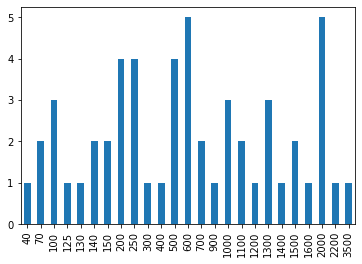

In [4]:
# kanskje gj칮r om til intervaller? 
df[questions[1]].value_counts().sort_index().plot(kind='bar')

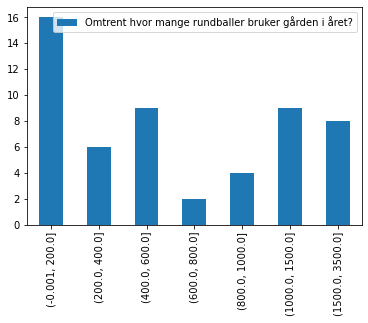

In [5]:
out = pd.cut(df[questions[1]], bins=[0, 200, 400, 600, 800, 1000, 1500, 3500], include_lowest=True)
out.value_counts(sort=False).plot(kind='bar').legend(loc=0)



# 2: Ca. hvor mange lage plast er det p친 hver rundball?

Verdier som ligger langt uten for rimelighentes grenser (feks. 690 lag) er fjernet.

Noen har svart med intervaller, feks 10-12, som har har blit gjort om til gjennomsnittet 10-12=11. 

En person svart "8 lag" -> "8"

<AxesSubplot:>

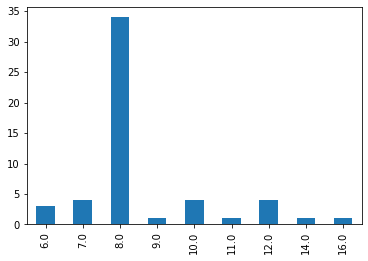

In [6]:
df[questions[2]].value_counts().sort_index().plot(kind='bar')

# 3: Presser du egne rundballer eller kj칮per du tjenesten (dvs. kj칮pe pressing, pakking og plast som en pakke)?
Ingenting som m친tte endres p친

<AxesSubplot:>

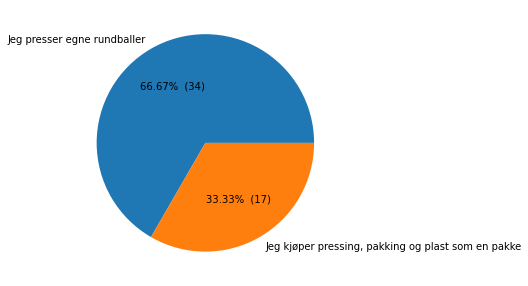

In [7]:

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
    
df[questions[3]].value_counts().plot.pie(figsize=(5,5), ylabel="", autopct=make_autopct(df[questions[3]].value_counts()))


# 4: Hvis du presser egne, hvor mye betaler du (ca) for plasten i 친ret? 

To har svart "Mellom kr 6000- 8000" -> 7000

En har svart "Ca kr 45 pr ball", vedkommende har ogs친 svart p친 #1 (antall rundballer i 친ret) som er 300 rundballer i 친ret, som gir 45 * 300 = 13 500 kr

En har svart "40lapper". Antar at lapper betyr 1000 kr -> 40 000 kr. 

En annen har svart "ca 840 pr rull i 친r" som ikke lar seg tolkes s친 svaret er dermed fjernet. 


<AxesSubplot:>

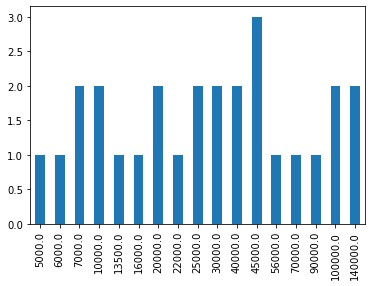

In [8]:
df[questions[4]].value_counts().sort_index().plot(kind='bar')


# 5: Hvis du kj칮per pressing, pakking og plast, hvor mye betaler du (ca) for dette i 친ret?

En har svart "200 ,- pr stk + mva", vedkommende har ogs친 svart p친 # 1 (1400), som gir 200 * 1400 = 280 000 kr

En annen har svart "200 per ball" og svart # 1 (140), som gir 200 * 140 = 28 000kr

<AxesSubplot:>

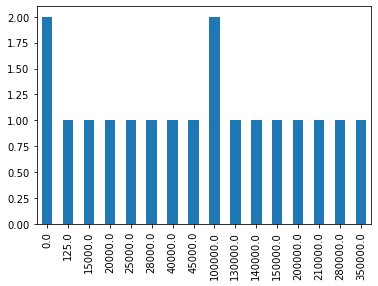

In [9]:
df[questions[5]].value_counts().sort_index().plot(kind="bar")

# 6: Alder
Ingenting 친 endre p친

<AxesSubplot:>

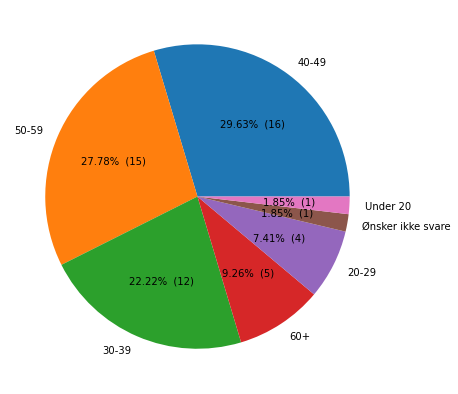

In [10]:
df[questions[6]].value_counts().plot.pie(figsize=(7,7), ylabel="", autopct=make_autopct(df[questions[6]].value_counts()))

# Inndeling: Utfordringer knyttet til resirkulering av rundballeplast


# 7: Opplever du utfordringer med oppbevaring av plast?
Inteingt 친 endre p친. 

<AxesSubplot:>

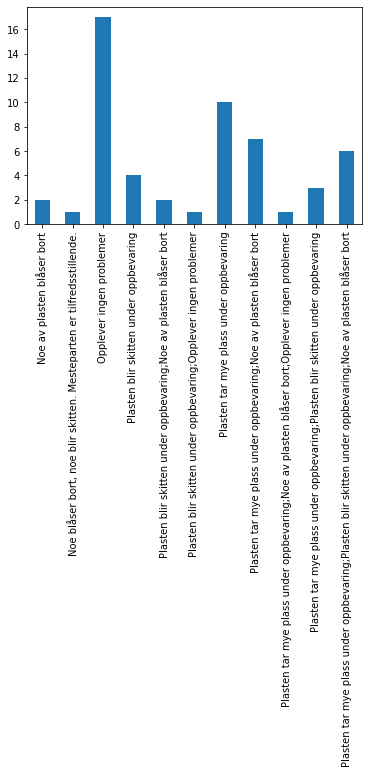

In [11]:
# Fikse denne....
df[questions[7]].value_counts().sort_index().plot(kind="bar")

# 8: Hvor oppbevarer du plasten? (Innend칮rs, utend칮rs, under tak, i container osv.)
Flere svart "ute" -> Utend칮rs og "inne" -> "Innend칮rs" 

"Utend칮rs ved siden av rundballelageret." -> "Utend칮rs"

"Under tak i en carport" -> Carport

"Inne p친 l친ven" -> "Innend칮rs"

"B친de ute og inne allt etter hvor de er n친r de strippes" -> "Innend칮rs;Utend칮rs"

"I vedsekker, noe innend칮rs noe utend칮rs" -> "Innend칮rs;Utend칮rs;Vedsekk"

"Ute underl친vebrua og sn칮" -> "Utend칮rs"

"I forsentral innend칮rs" -> "Innend칮rs"

"Eg legger plasten i vedsekk i ein ibc dunk." -> "Vedsekk;Container"

"Bruker vedkorg for storsekk" -> "Vedkorg"

"Pakker inne buntes sammen lagres ute" -> "Utend칮rs"

"Under tak til det er fult inne da blir det flyttet ut i container" -> "Innend칮rs;Container"

"P친 pakker ute etter at den er presset" -> "Utend칮rs"

"container som blir t칮mt av renovasjonsselskap n친r den er full" -> "Container"

"Utend칮rs, ved fj칮sveggen i ly for vinden, stort sett" -> "Utend칮rs"

"Utend칮rs, i 1500 liters vedsekk" -> "Utend칮rs;Vedsekk"

"Ute,men i container" -> "Container"

"Blir presset i firkantballer og blir lagret ute. S친 lenge dei er presset og buntet sammen med tau s친 fungerer det godt." -> "Utend칮rs"

"Oppsamling innand칮rs, oppbevaring for avhenting p친 skjerma plass ute" -> "Utend칮rs"

"Utend칮rs container" -> "Container"

<AxesSubplot:>

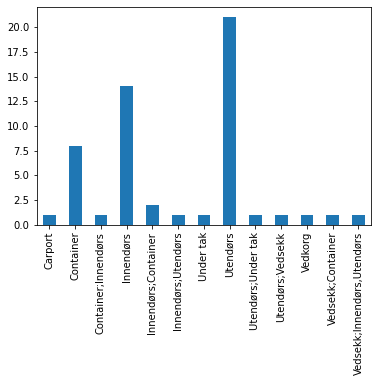

In [12]:
df[questions[8]].value_counts().sort_index().plot(kind="bar")

# 9: Bruker du en form for presse til 친 komprimere plasten?


<AxesSubplot:ylabel='Bruker du en form for presse til 친 komprimere plasten?'>

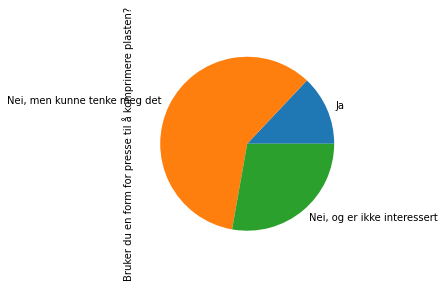

In [13]:
df[questions[9]].value_counts().sort_index().plot(kind="pie")

# 10: Kommentar (For eksempel hva slags presse, vil det gj칮re renhold enklere, l칮se plassproblemer osv., tanker om pris):


In [14]:
df[questions[10]].dropna()


0                                           Papp presse
3     Prisen b칮r ikke overstige ca. 30000 kr hvis de...
5     Ei presse hvor en kan bruke traktorens hydraul...
7             Gammel rundballepresse eller kommprimator
8     Vil bli enklere 친 transportere til mottak. Vil...
9     Pris er avgj칮rende p친 pressa men plasten har b...
14                      Hopper selv plasten i vedsekker
15            L칮ser plassproblemer og lettere 친 levere.
16    Komprimerer med traktor, leverer et lass som k...
18            칒nsker presse, alt for dyrt 친 investere i
19                                             Vet ikke
22                                   Lik ei papirpresse
23    M친 v칝re billig, gjerne s친nn som ogs친 kan press...
25                          Komprimator til billig pris
26    Liten presse til under 10 tusen, for oss som d...
27    Ein enkel papp/plast komprimator vil gj칮re pla...
28    Koster for mye, ingen plass 친 ha presse innend칮rs
29                              Enkel emballasje

# 11: Hvordan rengj칮r du plasten f칮r den leveres/hentes?

<AxesSubplot:>

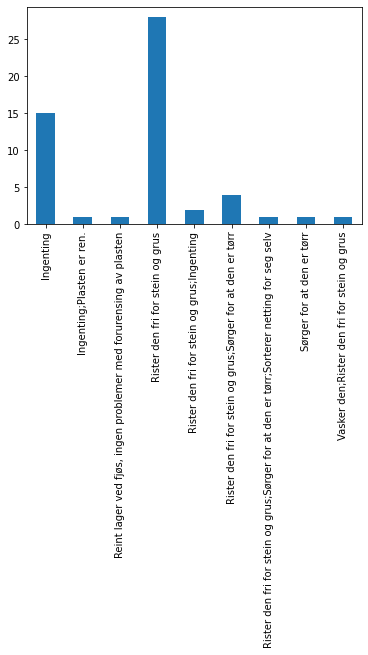

In [15]:
df[questions[11]].value_counts().sort_index().plot(kind="bar")

# 12: Utfordringer knyttet til dette?

In [16]:
df[questions[12]].dropna()

3     Enkelt n친r det brukes bredplast i stedet for n...
5                            Blir med en del is og sn칮.
7     Plasten tar mye plass og b칮r ikke lagres direk...
8     Det vil alltid sitte igjen sm친 mengder forrest...
14                                                  Nei
15    Noe f칪rrester kan ligge mellom laga med plast....
16                                                Ingen
19                                                  Nei
22                                                  Nei
23                                                  Nei
26                        Ingen returordning i kommunen
28     is tiner seint, s친 det m친 taes over flere runder
32                                                Ingen
33                                           Mye arbeid
35                                Ikke all dritt g친r av
36                       Blir veldig bl칮tt rundt pressa
37    Innerfolien er vanskelegare 친 f친 rein enn sj칮l...
40                     Tidkrevende og vaske all 

# 13: Hender det at du lar plasten ligge igjen p친 jordet? I s친 fall, hvorfor?

"Hender ikke" -> "Nei"

"Aldri" -> "Nei"

I Google Forms blir svarene presentert i en bar chart, men tenker at det er mer praktisk 친 vise fram svarene til de som ikke har svart "Nei".

In [35]:
q13 = df[df[questions[13]] != "Nei"][questions[13]].dropna()

print_answers(q13)


1 Noen ender kan v칝re frosset fast.
2 Om det fryser fast/ sn칮r ned. Runder hvor vi plukker opp n친r v칝ret tillater
3 Ja, sm친 strimler eller lignende. rein latskap
4 I utgangspunktet ikke. Det som kan skje er at halen kommer undet hjulet p친 traktoren og blir slitt av, men dette blir plukket opp, men noen ganger kan det jo skje at en ikke ser dei.
5 Fryser fast ibakken


# 14: Hvordan hentes/leveres plasten til gjenvinning?

<AxesSubplot:ylabel='Bruker du en form for presse til 친 komprimere plasten?'>

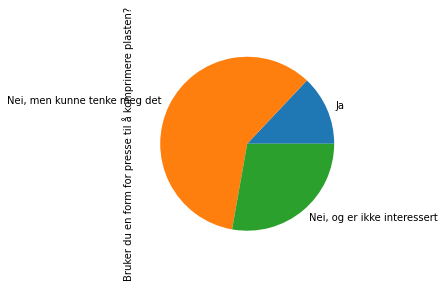

In [18]:
df[questions[9]].value_counts().sort_index().plot(kind="pie")

# 15: Fungerer henting/levering av plast greit?

<AxesSubplot:>

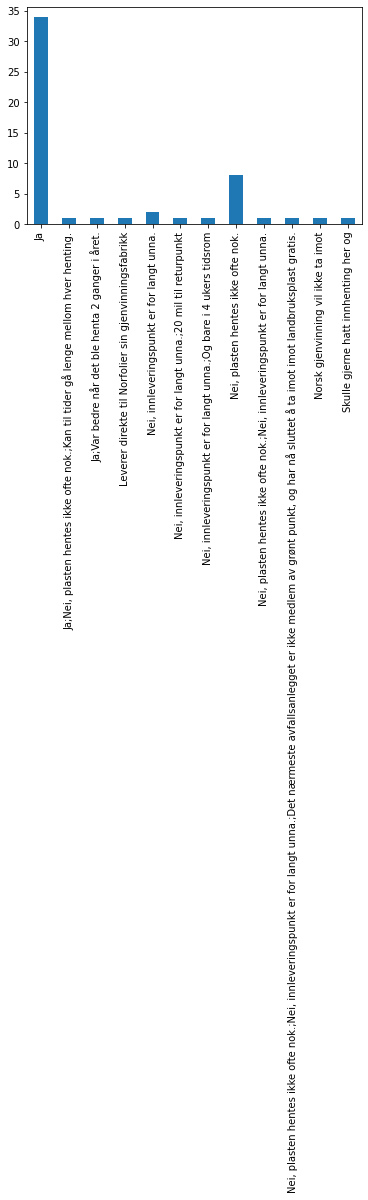

In [19]:
df[questions[15]].value_counts().sort_index().plot(kind="bar")

# Inndeling: Pilotprosjekt - resirkulering av landbruksplast

# 16: Hva mener du om en slik ordning? (som beskrevet 칮verst)

In [36]:
q16 = df[questions[16]].dropna()

print_answers(q16)


1 Greit de men m친 da hentes i l칮pet av mai
2 Lurt
3 Det h칮res interessant ut
4 Positiv
5 Bra
6 Ordningen h칮res veldig bra ut, h친per flere vil samarbeide og bidra med dette ogs친
7 Kunne v칝rt interessant hvis plasten blir hentet opptil 4 ganger i 친ret s친 en slipper 친 ha plast liggende over "hele garden"
8 Blir da avhengig av 친 kj칮pe plast fra de?! Ikke ideelt. Det er og umulig 친 f친 all plast heil rein for grus etc, skal ikke mer til en at en kj칮rer over den en gang, eller setter rundballen med plast med et sted det er litt s칮lete, f칮r den blir m칮kkete. Det vil v칝re totalt uaktuelt 친 m친tte vaske plaste. Opplegget som det er n친, med gratis mottak fungerer relativt greit, men det er for lange avstander til disse mottakene. Det burde v칝re kortere vei for 친 levere.
9 Bra
10 Vet ikke
11 Er nok for langt unna til at det l칮nner seg samt er liten bruker
12 Interessant
13 Godt tiltak
14 Har allerede en gjennvinningsgrad p친 tiln칝rmet 100% (minus svinn/tap i forbindelse med pressing og transport) og

# 17:  Hvor stor andel av kj칮pesummen av plasten m친 minst refunderes for at dette prosjektet er interessant?

<AxesSubplot:ylabel='Hvor stor andel av kj칮pesummen av plasten m친 minst refunderes for at dette prosjektet er interessant?'>

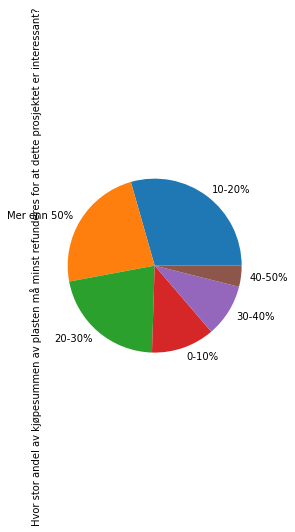

In [21]:
df[questions[17]].dropna().value_counts().plot(kind="pie")

# 18: Hva er den viktigste motivasjonen for deg?

<AxesSubplot:ylabel='Hva er den viktigste motivasjonen for deg?'>

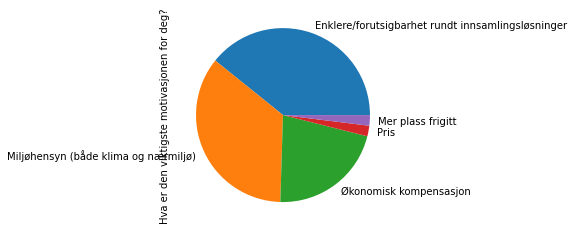

In [22]:
df[questions[18]].dropna().value_counts().plot(kind="pie")

# 19: Vil du v칝re villig til binde deg til 칠n leverand칮r av plast og utstyr for en periode?

<AxesSubplot:ylabel='Vil du v칝re villig til binde deg til 칠n leverand칮r av plast og utstyr for en periode?'>

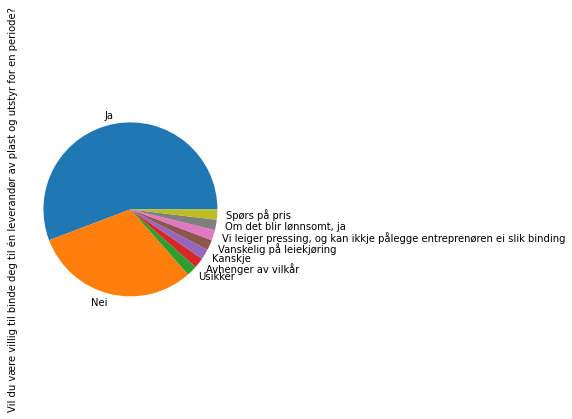

In [23]:
df[questions[19]].dropna().value_counts().plot(kind="pie")

# 20: Er det interessant om en enkel plastpresse inng친r i avtalen med Orkel?

<AxesSubplot:>

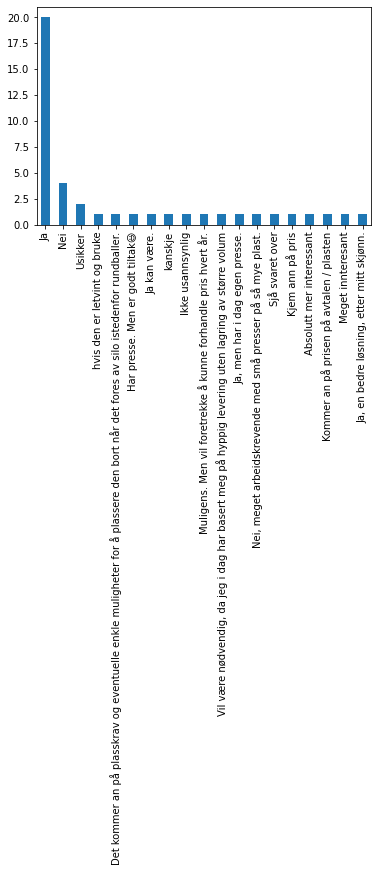

In [24]:
df[questions[20]].dropna().value_counts().plot(kind="bar")

In [37]:
q20 = df[df[questions[20]] != "Ja"][questions[20]].dropna()
print_answers(q20)

1 Nei
2 Ja, en bedre l칮sning, etter mitt skj칮nn.
3 Har presse. Men er godt tiltak游땎
4 Vil v칝re n칮dvendig, da jeg i dag har basert meg p친 hyppig levering uten lagring av st칮rre volum
5 Kommer an p친 prisen p친 avtalen / plasten
6 Meget innteresant
7 kanskje
8 Ikke usannsynlig
9 Nei
10 Nei, meget arbeidskrevende med sm친 presser p친 s친 mye plast.
11 Usikker
12 Absolutt mer interessant
13 Sj친 svaret over
14 Det kommer an p친 plasskrav og eventuelle enkle muligheter for 친 plassere den bort n친r det fores av silo istedenfor rundballer.
15 Kjem ann p친 pris
16 Ja kan v칝re.
17 Nei
18 Usikker
19 Ja, men har i dag egen presse.
20 Muligens. Men vil foretrekke 친 kunne forhandle pris hvert 친r.
21 Nei
22 hvis den er letvint og bruke


# Inndeling: Takk for din deltagelse!

# 21: Har du noen andre kommentarer?

In [38]:
q21 = df[questions[21]].dropna()
print_answers(q21)

1 Hvis et slikt opplegg gj칮r plastkostnadene rimeligere tror jeg interessen kan v칝re stor, s친 suksessen vil avhenge av at plastpris minus refusjon minst blir konkurransedyktig i markedet.
2 Det kler beste, og mest milj칮vennlige vil v칝re 친 f친 en strekkplast som l칮ser seg opp etter en tid, og som kanskje dyr kan spise uten problem
3 Har hatt en brukbar ordning med innsamling av plast gjennom gr칮nt punkt, n친r ordningen begynner 친 fungere s친 fjernes selvf칮lgelig tilskuddet til renovat칮rer s친 disse gir seg med innsamling.
4 H친per det kommer gode l칮sninger
5 Se p친 comprimatorer med store inkastningsrom, dette gj칮r h친ndtering og lagring av plasten enkel. Hentes enkelt med krokbil.
6 Tenker det er viktig med gode l칮sninger p친 oppbevaring og innsamling, rundballeplast p친 avveie synes godt og kan se mye ut,selv om det bare er noen f친 remser.
7 Bra det settes fokus p친 rundballeplast
8 Flott prosjekt.
9 For at dette skal v칝re interessant m친 det bidra til lavere kostnader. Oppbevaring av plast og i